# **STB600 Lab 2: Intensity transformation and spatial filtering**

1. **Purpose of the Lab**

This lab provides practice with key image processing operations: intensity transforma-
tions and spatial filtering.

You will implement, analyze, and compare different methods,
using real images in Python and OpenCV.

2. **Learning Outcomes**
After completing this lab, you will be able to:

• Apply common intensity transformations (negative, log, gamma).

• Implement and compare spatial filters (averaging, Gaussian, median).

• Explain the visual effect and practical use of each method.

• Interpret results and reflect on advantages and limitations.

4. **Instructions**
Work through each task below. During the oral demonstration with the lab assistant,
you should be able to:

•Show the original and processed images on your screen.

•Explain the effect of each method in 2–3 sentences.

•Discuss when the method is useful and its limitations.

•Compare the filtering methods based on your observations.

•Be prepared for follow-up questions to confirm your understanding of the methods.


## 5. **Intensity Transformations**

In this section, use img.tif. Before starting, load the image:

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

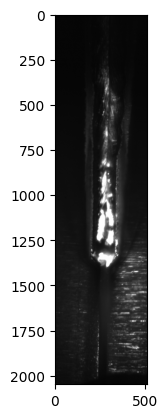

In [38]:
img = cv2.imread('img.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap = "gray")



## **5.1 Image Negative**

Concept. Image negatives invert brightness: bright areas become dark and vice versa.

Useful for analyzing biomedical images, X-rays, and low-intensity details.
You may find the following operations useful.

• cv2.bitwise_not()

• or simply computing 255 - img

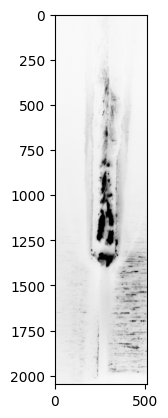

In [39]:
img_neg = cv2.bitwise_not(img)
plt.imshow(img_neg,cmap = "gray")



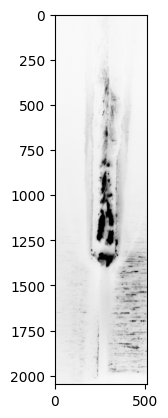

In [40]:
img_neg_2 = 255-img
plt.imshow(img_neg_2,cmap = "gray")


## **5.2 Log Transformation**
Concept. The log transform enhances dark regions by compressing high-intensity values.

s = c · log(1 + r)

You may find the following operations useful.

• np.log() or np.log1p()

• cv2.normalize() to scale the result back to the range 0–255


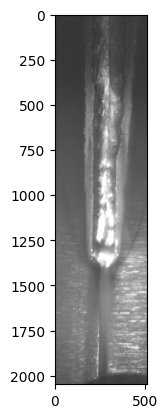

In [41]:
img_float = img.astype(np.float32)
c = 255 / np.log(1 + np.max(img_float))
log_img = c*np.log(1 + img_float)

plt.imshow(log_img,cmap="gray")

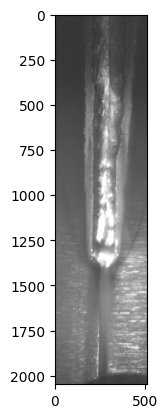

In [42]:
img_normalize = cv2.normalize(log_img,None)
plt.imshow(img_normalize,cmap="gray")

## **5.3 Gamma (Power-Law) Transformation**
Concept. Gamma modifies contrast according to:

s = crγ

• γ < 1: enhances dark regions.

• γ > 1: enhances bright regions.

You may find the following operations useful.

You may find the following operations useful.

• np.power() or (img / 255.0) ** gamma

• cv2.normalize() if you need to rescale to 0–255


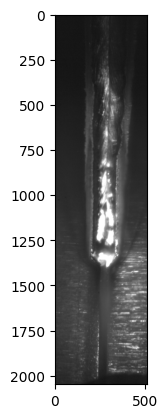

In [43]:
gamma = 0.5
img_gamma = (img/255)**gamma
plt.imshow(img_gamma,cmap="gray")

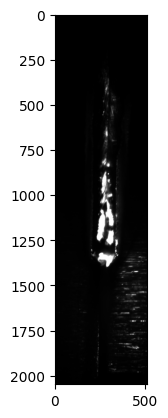

In [44]:
gamma = 2
img_gamma = (img/255)**gamma
plt.imshow(img_gamma,cmap="gray")

## **6. Spatial Filtering**
Use gaussianNoiseImg.tif and peppersaltImg.tif.

**6.1 Averaging Filter**

Concept. Reduces noise by averaging neighbouring pixels; however, it blurs edges strongly.

You may find the following functions useful.

• cv2.blur()

• or cv2.filter2D() with a uniform kernel

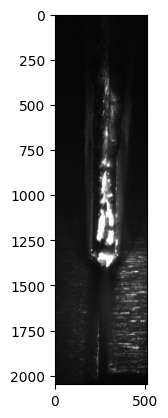

In [54]:
img = cv2.imread("gaussianNoiseImg.tif", 0)
cv2.imshow("gaussianNoiseImg",img)
cv2.waitKey(0)
plt.imshow(img,cmap="gray")

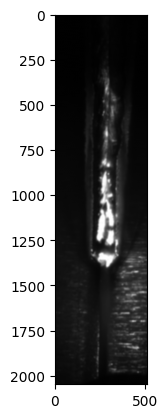

In [46]:
img_blur = cv2.blur(img,[10,10],None)
cv2.imshow("ImgBlur",img_blur)
cv2.waitKey(0)
plt.imshow(img_blur,cmap="gray")


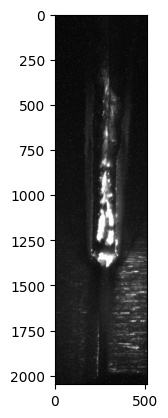

In [55]:
img_2 = cv2.imread("peppersaltImg.tif", 0)
cv2.imshow("PepperSalt",img_2)
cv2.waitKey(0)
plt.imshow(img_2,cmap="gray")

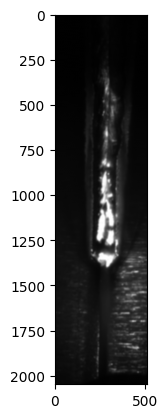

In [48]:
img_blur_2 = cv2.blur(img_2,[10,10],None)
cv2.imshow("ImgBlur",img_blur)
cv2.waitKey(0)
plt.imshow(img_blur,cmap="gray")


## **6.2 Gaussian Filter**

Concept. Uses a weighted kernel; smoother and preserves edges better than simple aver-aging.

You may find the following function useful.

•cv2.GaussianBlur()

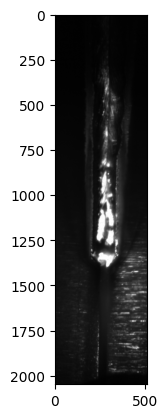

In [53]:
img_g_blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow("ImgGussianBlur",img_g_blur)
cv2.waitKey(0)
plt.imshow(img_g_blur,cmap="gray")


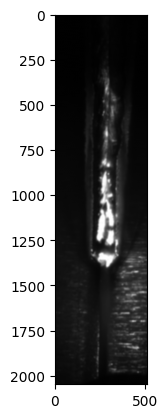

In [56]:
img_g_blur_2 = cv2.GaussianBlur(img_2,(5,5),0)
cv2.imshow("ImgGaussianBlur",img_blur)
cv2.waitKey(0)
plt.imshow(img_blur,cmap="gray")

## **6.3 Median Filter**
Concept. Very effective for salt-and-pepper noise because it replaces each pixel with the
median of its neighbourhood.

You may find the following function useful.

•cv2.medianBlur()

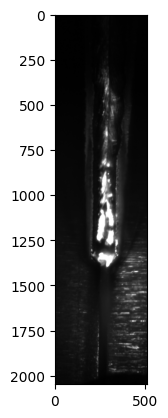

In [51]:
img_m_blur = cv2.medianBlur(img,5)
cv2.imshow("ImgGussianBlur",img_m_blur)
cv2.waitKey(0)
plt.imshow(img_m_blur,cmap="gray")

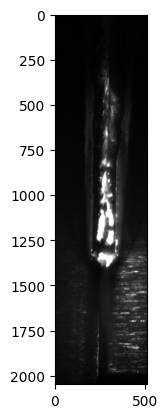

In [57]:
img_m_blur_2 = cv2.medianBlur(img_2,5)
cv2.imshow("ImgGussianBlur",img_m_blur_2)
cv2.waitKey(0)
plt.imshow(img_m_blur_2,cmap="gray")

## **Reflection Questions**

Possible follow-up questions include, but are not limited to:

• **Which filter performs best on salt-and-pepper noise? Why?**

The median since it will take the closet level of intensity instead of adding the noise into the average calculaiton.

• **How does increasing kernel size affect smoothing and edge detail?**

As bigger the kernel is as smoother the image get, because it will use information from fruther pixels, what means not close to the edge.

• **Compare the visual differences between averaging and Gaussian filtering.**

The edges looks better.

